# Climate Change Analysis

Romaisa Nadeem

#### 1. Introduction

The data used in this project was sourced from
[Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data?select=GlobalLandTemperaturesByCountry.csv).
This dataset offers an extensive look at global temperatures over time,
offering insight into the implications and impacts of climate change.
Since the industrial revolution, human actions, especially the
combustion of fossil fuels, have been the primary drivers of climate
change across the world (Garbary et al, 2021). While it’s evident that
global temperatures are rising, it’s crucial to investigate if these
trends are mirrored at the local level and how local geographical
patterns might amplify or mitigate these global climatic shifts (Garbary
et al, 2021). In this project, I am to extract meaningful insights about
global land temperatures and its variations over time across different
regions. I will ask the following questions:

1.  How has the global average temperature changed over time? 
2.  How has the average land temperature in Canada changed over the
    decades compared to the global average, and what are the variations
    across different provinces in Canada?
3.  How does the average land temperature vary across different parts of
    the world? 

These questions are essential and interesting for several reasons,
primarily due to their implications for understanding climate change,
its impacts, and regional variations in its effects:

1.  **Global Average Temperature Changes Over Time**: Understanding how
    the global average temperature has changed over time is crucial for
    recognizing the trends and patterns of climate change. This helps
    scientists confirm the warming of the planet, largely attributed to
    human activities such as deforestation and the burning of fossil
    fuels. The data enables predictions about future climate conditions
    and helps in planning mitigation strategies.

2.  **Average Land Temperature Changes in Canada Compared to the Global
    Average**: By examining how the average land temperature in Canada
    has changed over the decades and comparing it to the global average,
    one can discern how climate change impacts Canada specifically.
    Canada’s vast size and varied geography make it a significant case
    study for understanding different climate impacts within a single
    country.

3.  **Variations Across Different Provinces in Canada**: Analyzing
    temperature changes in different provinces of Canada can reveal
    localized patterns of climate change. Different areas may experience
    varied effects due to factors like proximity to oceans, altitude,
    and prevailing wind patterns. This localized data is critical for
    provincial and local governments to develop targeted adaptation and
    resilience strategies.

4.  **Temperature Variations Across Different Parts of the World**:
    Understanding how the average land temperature varies across
    different regions worldwide helps illustrate the unequal
    distribution of climate change effects. Some regions may experience
    more severe changes than others, which can influence global policies
    on climate action and aid distribution. This knowledge is also vital
    for biodiversity conservation, agricultural planning, and managing
    water resources affected by changing climates.

Each of these questions contributes to a comprehensive understanding of
Earth’s climatic systems, regional and global impacts of climate change,
and the necessary policy responses.

#### 2. Data Wrangling Plan

#### Global Temperatures Dataset

#### Iteration 1

Phase 1

1.  Read the csv file into R.

2.  Make the column names lowercase.

3.  Determine if the data is Tidy and if not, fix it.

4.  Identify UIDs.

5.  Drop unnecessary columns

Phase 2

In [ ]:
##1. 
temp_tib <- read.csv("GlobalTemperatures.csv") %>% 
  glimpse()

Rows: 3,192
Columns: 9
$ dt                                        <chr> "1750-01-01", "1750-02-01", …
$ LandAverageTemperature                    <dbl> 3.034, 3.083, 5.626, 8.490, …
$ LandAverageTemperatureUncertainty         <dbl> 3.574, 3.702, 3.076, 2.451, …
$ LandMaxTemperature                        <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ LandMaxTemperatureUncertainty             <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ LandMinTemperature                        <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ LandMinTemperatureUncertainty             <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ LandAndOceanAverageTemperature            <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ LandAndOceanAverageTemperatureUncertainty <dbl> NA, NA, NA, NA, NA, NA, NA, …

In [ ]:
##2. 
temp_tib1 <- temp_tib %>% rename_with(tolower) %>% glimpse()

Rows: 3,192
Columns: 9
$ dt                                        <chr> "1750-01-01", "1750-02-01", …
$ landaveragetemperature                    <dbl> 3.034, 3.083, 5.626, 8.490, …
$ landaveragetemperatureuncertainty         <dbl> 3.574, 3.702, 3.076, 2.451, …
$ landmaxtemperature                        <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ landmaxtemperatureuncertainty             <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ landmintemperature                        <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ landmintemperatureuncertainty             <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ landandoceanaveragetemperature            <dbl> NA, NA, NA, NA, NA, NA, NA, …
$ landandoceanaveragetemperatureuncertainty <dbl> NA, NA, NA, NA, NA, NA, NA, …

In [ ]:
##3.
temp_tib1 %>% count (landaveragetemperature, dt) %>% filter(n >1)

[1] landaveragetemperature dt                     n                     
<0 rows> (or 0-length row.names)

• The uid’s are dt and landaveragetemperature.

In [ ]:
##4. 
temp_tib2 <- temp_tib1 %>% select(landaveragetemperature, dt)
temp_tib2 %>% glimpse

Rows: 3,192
Columns: 2
$ landaveragetemperature <dbl> 3.034, 3.083, 5.626, 8.490, 11.573, 12.937, 15.…
$ dt                     <chr> "1750-01-01", "1750-02-01", "1750-03-01", "1750…

#### Iteration 2

Phase 1

1.  Check for NA values in the columns.

    -   Drop NA values.

2.  Mutate a new column for year.

    -   Calculate average temperatures by year.

3.  Check if the tibble is Tidy.

In [ ]:
##1. 
temp_tib2 %>% summary()

 landaveragetemperature      dt           
 Min.   :-2.080         Length:3192       
 1st Qu.: 4.312         Class :character  
 Median : 8.611         Mode  :character  
 Mean   : 8.375                           
 3rd Qu.:12.548                           
 Max.   :19.021                           
 NA's   :12                               

In [ ]:
temp_tib3 <- temp_tib2 %>% drop_na()
temp_tib3 %>% summary()

 landaveragetemperature      dt           
 Min.   :-2.080         Length:3180       
 1st Qu.: 4.312         Class :character  
 Median : 8.611         Mode  :character  
 Mean   : 8.375                           
 3rd Qu.:12.548                           
 Max.   :19.021                           

In [ ]:
##2. 
temp_tib4 <- temp_tib3 %>%
  mutate(year = year(as.Date(dt)))
temp_tib4 %>% glimpse

Rows: 3,180
Columns: 3
$ landaveragetemperature <dbl> 3.034, 3.083, 5.626, 8.490, 11.573, 12.937, 15.…
$ dt                     <chr> "1750-01-01", "1750-02-01", "1750-03-01", "1750…
$ year                   <dbl> 1750, 1750, 1750, 1750, 1750, 1750, 1750, 1750,…

In [ ]:
yearly_avg_temp <- temp_tib4 %>%
  group_by(year) %>% 
  summarise(avg_temp = mean(landaveragetemperature))
yearly_avg_temp %>% glimpse

Rows: 266
Columns: 2
$ year     <dbl> 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1…
$ avg_temp <dbl> 8.719364, 7.976143, 5.779833, 8.388083, 8.469333, 8.355583, 8…

In [ ]:
##3. 
yearly_avg_temp %>% head(10)

# A tibble: 10 × 2
    year avg_temp
   <dbl>    <dbl>
 1  1750     8.72
 2  1751     7.98
 3  1752     5.78
 4  1753     8.39
 5  1754     8.47
 6  1755     8.36
 7  1756     8.85
 8  1757     9.02
 9  1758     6.74
10  1759     7.99

#### Global Land Temperatures By Country Dataset

#### Iteration 1

Phase 1

1.  Read the csv file into R.

2.  Make the column names lowercase.

3.  Identify UIDs.

4.  Drop unnecessary columns

Phase 2

In [ ]:
##1. 
country_tib <- read.csv("GlobalLandTemperaturesByCountry.csv") %>% 
  glimpse()

Rows: 577,462
Columns: 4
$ dt                            <chr> "1743-11-01", "1743-12-01", "1744-01-01"…
$ AverageTemperature            <dbl> 4.384, NA, NA, NA, NA, 1.530, 6.702, 11.…
$ AverageTemperatureUncertainty <dbl> 2.294, NA, NA, NA, NA, 4.680, 1.789, 1.5…
$ Country                       <chr> "Åland", "Åland", "Åland", "Åland", "Åla…

In [ ]:
##2. 
country_tib1 <- country_tib %>% rename_with(tolower) %>% glimpse()

Rows: 577,462
Columns: 4
$ dt                            <chr> "1743-11-01", "1743-12-01", "1744-01-01"…
$ averagetemperature            <dbl> 4.384, NA, NA, NA, NA, 1.530, 6.702, 11.…
$ averagetemperatureuncertainty <dbl> 2.294, NA, NA, NA, NA, 4.680, 1.789, 1.5…
$ country                       <chr> "Åland", "Åland", "Åland", "Åland", "Åla…

In [ ]:
##3. 
country_tib1 %>% count (averagetemperature, country, dt) %>% filter(n >1)

[1] averagetemperature country            dt                 n                 
<0 rows> (or 0-length row.names)

• The uids are averagetemperature, country and dt.

In [ ]:
##4. 
country_tib2 <- country_tib1 %>% select(averagetemperature, country, dt)
country_tib2 %>% glimpse

Rows: 577,462
Columns: 3
$ averagetemperature <dbl> 4.384, NA, NA, NA, NA, 1.530, 6.702, 11.609, 15.342…
$ country            <chr> "Åland", "Åland", "Åland", "Åland", "Åland", "Åland…
$ dt                 <chr> "1743-11-01", "1743-12-01", "1744-01-01", "1744-02-…

#### Iteration 2

Phase 1

1.  Check for NA values in the columns.

    -   Drop NA values.

2.  Mutate a new column for year.

3.  Group data by the country column.

    -   Calculate average temperatures for each country.

4.  Check if the tibble is Tidy.

Phase 2

In [ ]:
##1. 
country_tib2 %>% summary()

 averagetemperature   country               dt           
 Min.   :-37.66     Length:577462      Length:577462     
 1st Qu.: 10.03     Class :character   Class :character  
 Median : 20.90     Mode  :character   Mode  :character  
 Mean   : 17.19                                          
 3rd Qu.: 25.81                                          
 Max.   : 38.84                                          
 NA's   :32651                                           

In [ ]:
country_tib3 <- country_tib2 %>% drop_na()
country_tib3 %>% summary()

 averagetemperature   country               dt           
 Min.   :-37.66     Length:544811      Length:544811     
 1st Qu.: 10.03     Class :character   Class :character  
 Median : 20.90     Mode  :character   Mode  :character  
 Mean   : 17.19                                          
 3rd Qu.: 25.81                                          
 Max.   : 38.84                                          

In [ ]:
##2. 
country_tib4 <- country_tib3 %>%
  mutate(year = year(as.Date(dt)))
country_tib4 %>% glimpse

Rows: 544,811
Columns: 4
$ averagetemperature <dbl> 4.384, 1.530, 6.702, 11.609, 15.342, 11.702, 5.477,…
$ country            <chr> "Åland", "Åland", "Åland", "Åland", "Åland", "Åland…
$ dt                 <chr> "1743-11-01", "1744-04-01", "1744-05-01", "1744-06-…
$ year               <dbl> 1743, 1744, 1744, 1744, 1744, 1744, 1744, 1744, 174…

In [ ]:
##3. 
countries_avg_temp <- country_tib4 %>%
  group_by(country) %>% 
  summarise(avg_temp = mean(averagetemperature))
countries_avg_temp %>% glimpse

Rows: 242
Columns: 2
$ country  <chr> "Afghanistan", "Africa", "Albania", "Algeria", "American Samo…
$ avg_temp <dbl> 14.045007, 24.074203, 12.610646, 22.985112, 26.611965, 11.201…

In [ ]:
##4. 
countries_avg_temp %>% head(10)

# A tibble: 10 × 2
   country             avg_temp
   <chr>                  <dbl>
 1 Afghanistan             14.0
 2 Africa                  24.1
 3 Albania                 12.6
 4 Algeria                 23.0
 5 American Samoa          26.6
 6 Andorra                 11.2
 7 Angola                  21.8
 8 Anguilla                26.6
 9 Antigua And Barbuda     26.4
10 Argentina               14.6

#### Global Land Temperatures By State Dataset

#### Iteration 1

Phase 1

1.  Read the csv file into R.

2.  Make the column names lowercase.

3.  Identify UIDs.

4.  Drop unnecessary columns

Phase 2

In [ ]:
##1. 
province_tib <- read.csv("GlobalLandTemperaturesByState.csv") %>% 
  glimpse()

Rows: 645,675
Columns: 5
$ dt                            <chr> "1855-05-01", "1855-06-01", "1855-07-01"…
$ AverageTemperature            <dbl> 25.544, 24.228, 24.371, 25.427, 25.675, …
$ AverageTemperatureUncertainty <dbl> 1.171, 1.103, 1.044, 1.073, 1.014, 1.179…
$ State                         <chr> "Acre", "Acre", "Acre", "Acre", "Acre", …
$ Country                       <chr> "Brazil", "Brazil", "Brazil", "Brazil", …

In [ ]:
##2. 
province_tib1 <- province_tib %>% rename_with(tolower) %>% glimpse()

Rows: 645,675
Columns: 5
$ dt                            <chr> "1855-05-01", "1855-06-01", "1855-07-01"…
$ averagetemperature            <dbl> 25.544, 24.228, 24.371, 25.427, 25.675, …
$ averagetemperatureuncertainty <dbl> 1.171, 1.103, 1.044, 1.073, 1.014, 1.179…
$ state                         <chr> "Acre", "Acre", "Acre", "Acre", "Acre", …
$ country                       <chr> "Brazil", "Brazil", "Brazil", "Brazil", …

In [ ]:
##3. 
province_tib1 %>% count (averagetemperature, state, dt) %>% filter(n >1)

[1] averagetemperature state              dt                 n                 
<0 rows> (or 0-length row.names)

• These uids look good!

In [ ]:
##4. 
province_tib2 <- province_tib1 %>% select(averagetemperature, country, state, dt)
province_tib2 %>% glimpse

Rows: 645,675
Columns: 4
$ averagetemperature <dbl> 25.544, 24.228, 24.371, 25.427, 25.675, 25.442, 25.…
$ country            <chr> "Brazil", "Brazil", "Brazil", "Brazil", "Brazil", "…
$ state              <chr> "Acre", "Acre", "Acre", "Acre", "Acre", "Acre", "Ac…
$ dt                 <chr> "1855-05-01", "1855-06-01", "1855-07-01", "1855-08-…

#### Iteration 2

Phase 1

1.  Check for NA values in the columns.

    -   Drop NA values.

2.  Mutate a new column for year.

3.  Filter out Canada from the ‘country’ column and focus on the
    provinces with Canada from the ‘state’ column.

    -   Calculate average temperatures for each province within Canada.

4.  Check if the tibble is Tidy.

Phase 2

In [ ]:
##1. 
province_tib2 %>% summary()

 averagetemperature   country             state                dt           
 Min.   :-45.389    Length:645675      Length:645675      Length:645675     
 1st Qu.: -0.693    Class :character   Class :character   Class :character  
 Median : 11.199    Mode  :character   Mode  :character   Mode  :character  
 Mean   :  8.993                                                            
 3rd Qu.: 19.899                                                            
 Max.   : 36.339                                                            
 NA's   :25648                                                              

In [ ]:
province_tib3 <- province_tib2 %>% drop_na()
province_tib3 %>% summary()

 averagetemperature   country             state                dt           
 Min.   :-45.389    Length:620027      Length:620027      Length:620027     
 1st Qu.: -0.693    Class :character   Class :character   Class :character  
 Median : 11.199    Mode  :character   Mode  :character   Mode  :character  
 Mean   :  8.993                                                            
 3rd Qu.: 19.899                                                            
 Max.   : 36.339                                                            

In [ ]:
##2. 
province_tib4 <- province_tib3 %>%
  mutate(year = year(as.Date(dt)))
province_tib4 %>% glimpse

Rows: 620,027
Columns: 5
$ averagetemperature <dbl> 25.544, 24.228, 24.371, 25.427, 25.675, 25.442, 25.…
$ country            <chr> "Brazil", "Brazil", "Brazil", "Brazil", "Brazil", "…
$ state              <chr> "Acre", "Acre", "Acre", "Acre", "Acre", "Acre", "Ac…
$ dt                 <chr> "1855-05-01", "1855-06-01", "1855-07-01", "1855-08-…
$ year               <dbl> 1855, 1855, 1855, 1855, 1855, 1855, 1855, 1855, 185…

In [ ]:
##3. 
canada_province_data <- province_tib4 %>%
  filter(country == "Canada") %>%
  group_by(state, year) %>% 
  summarise(avg_temp = mean(averagetemperature))  

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.

Rows: 2,763
Columns: 3
Groups: state [12]
$ state    <chr> "Alberta", "Alberta", "Alberta", "Alberta", "Alberta", "Alber…
$ year     <dbl> 1768, 1769, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1…
$ avg_temp <dbl> -3.57825000, 2.18875000, -8.91000000, 0.92175000, -0.31783333…

In [ ]:
##4. 
canada_province_data %>% head(10)

# A tibble: 10 × 3
# Groups:   state [1]
   state    year avg_temp
   <chr>   <dbl>    <dbl>
 1 Alberta  1768  -3.58  
 2 Alberta  1769   2.19  
 3 Alberta  1774  -8.91  
 4 Alberta  1775   0.922 
 5 Alberta  1776  -0.318 
 6 Alberta  1777  -0.230 
 7 Alberta  1778  -3.20  
 8 Alberta  1779  -0.0507
 9 Alberta  1780   3.77  
10 Alberta  1781  -2.92  

#### Iteration 3

Phase 1

1.  Inner join yearly_avg_temp tibble and canada_province_data tibble by
    year.
2.  Rename columns for clarity.

Phase 2

In [ ]:
##1. 
comparison_data <- inner_join(yearly_avg_temp, canada_province_data, by = "year")
comparison_data %>% glimpse

Rows: 2,748
Columns: 4
$ year       <dbl> 1750, 1750, 1750, 1750, 1750, 1751, 1751, 1751, 1751, 1751,…
$ avg_temp.x <dbl> 8.719364, 8.719364, 8.719364, 8.719364, 8.719364, 7.976143,…
$ state      <chr> "New Brunswick", "Newfoundland And Labrador", "Nova Scotia"…
$ avg_temp.y <dbl> 4.18845455, -1.40518182, 5.96663636, 0.55354545, 5.30972727…

In [ ]:
##2. 
comparison_data1 <- comparison_data %>%
  rename(global_avg_temp = avg_temp.x, canada_avg_temp = avg_temp.y)
comparison_data1 %>% glimpse

Rows: 2,748
Columns: 4
$ year            <dbl> 1750, 1750, 1750, 1750, 1750, 1751, 1751, 1751, 1751, …
$ global_avg_temp <dbl> 8.719364, 8.719364, 8.719364, 8.719364, 8.719364, 7.97…
$ state           <chr> "New Brunswick", "Newfoundland And Labrador", "Nova Sc…
$ canada_avg_temp <dbl> 4.18845455, -1.40518182, 5.96663636, 0.55354545, 5.309…

#### 3. Results & Visualizations

(`geom_line()`).

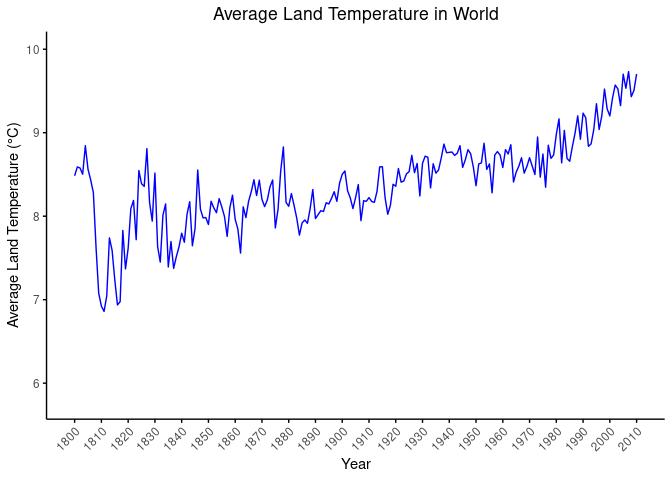

In [ ]:
##Question 1
#| fig-cap: "Figure 1: This graph depicts the trend in average land temperature globally from the year 1800 to 2010. The temperatures are measured in degrees Celsius (°C). A clear upward trend can be observed, particularly from the mid-20th century onwards, indicating a increase in global temperatures over the period."

ggplot(data = yearly_avg_temp, aes(x = year, y = avg_temp)) +
  geom_line(color = "blue") +
  labs(title = "Average Land Temperature in World", x = "Year", y = "Average Land Temperature (°C)") +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.ticks = element_line(color = "black"), 
    panel.background = element_blank(), 
    panel.grid = element_blank(), 
    axis.text.x = element_text(angle = 45, hjust = 1), 
    legend.position = "none",
    axis.line = element_line(color = "black") 
  ) +
  scale_x_continuous(breaks = seq(from = 1800, to = 2010, by = 10), limits = c(1800, 2010)) +
  scale_y_continuous(breaks = seq(from = 1, to = 20, by = 1), limits = c(min(yearly_avg_temp$avg_temp), 10))

Figure 1: This graph depicts the trend in average land temperature
globally from the year 1800 to 2010. The temperatures are measured in
degrees Celsius (°C). A clear upward trend can be observed, particularly
from the mid-20th century onwards, indicating a increase in global
temperatures over the period.

Figure 1 corresponds to the question, “How has the global average
temperature changed over time?”

In [ ]:
province_colors <- c(
  "Alberta" = "red",
  "British Columbia" = "orange",
  "Manitoba" = "cyan",
  "New Brunswick" = "yellow",
  "Newfoundland And Labrador" = "purple",
  "Northwest Territories" = "green",  
  "Nova Scotia" = "pink",             
  "Nunavut" = "aquamarine2",        
  "Ontario" = "darkolivegreen",
  "Prince Edward Island" = "maroon",
  "Saskatchewan" = "coral2",
  "Yukon" = "darkgoldenrod2",
  "Global" = "blue"                   
)

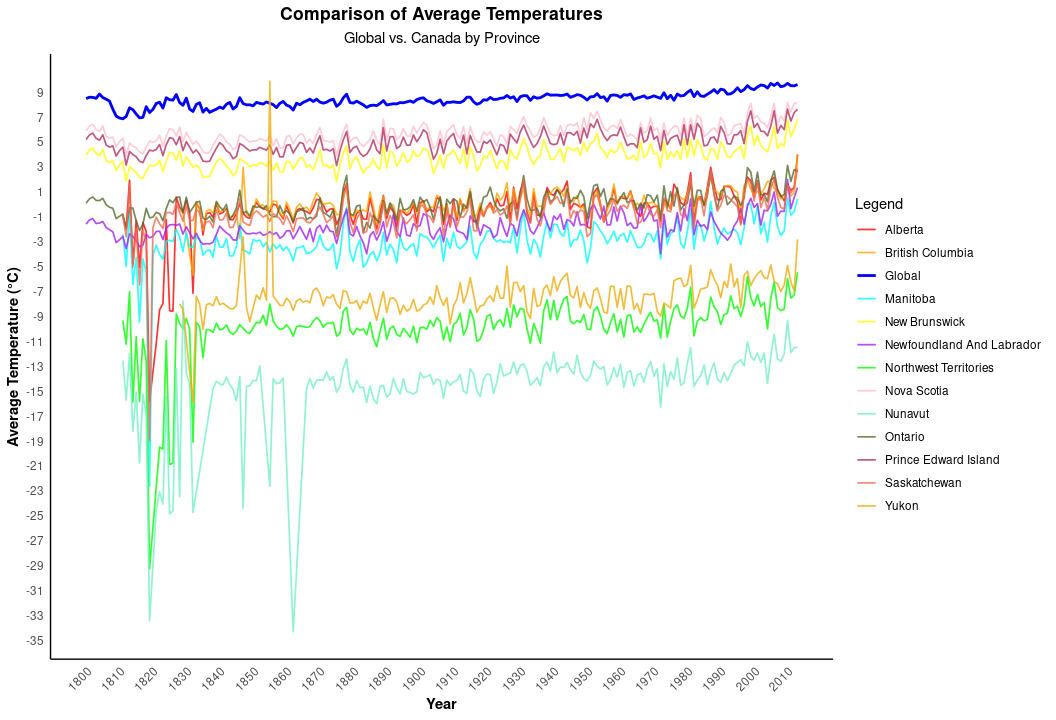

In [ ]:
##Question 2
#| fig-cap: "Figure 2: A comparison of average annual temperatures from 1800 to 2010, illustrating the temperature trends for various provinces in Canada alongside the global average temperature. The data shows variability across different regions, with the global average temperature trend exhibiting a warming pattern, especially noticeable in recent decades. Compared to the global average, Canada had lower average temperatures, with Nova Scotia being the highest, and Nunavut being the lowest."

filtered_data <- comparison_data1 %>%
  filter(year >= 1800)

ggplot(filtered_data, aes(x = year)) +
  geom_line(aes(y = global_avg_temp, colour = "Global"), linewidth = 1) +
  geom_line(aes(y = canada_avg_temp, colour = state), linewidth = 0.6, alpha = 0.8) +
  scale_x_continuous(breaks = seq(min(filtered_data$year), max(filtered_data$year), by = 10)) +
  scale_y_continuous(breaks = seq(floor(min(c(filtered_data$global_avg_temp, filtered_data$canada_avg_temp))),
                                   ceiling(max(c(filtered_data$global_avg_temp, filtered_data$canada_avg_temp))), by = 2)) +
  scale_color_manual(values = province_colors) + 
  labs(title = "Comparison of Average Temperatures",
       subtitle = "Global vs. Canada by Province",
       x = "Year",
       y = "Average Temperature (°C)",
       colour = "Legend") +
  theme_minimal() +
theme(plot.title = element_text(hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5),
      legend.position = "right",
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.text.y = element_text(hjust = 1),
      axis.title = element_text(face = "bold"),
      axis.line = element_line(linewidth = 0.5),
      panel.background = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      legend.background = element_blank())

Figure 2: A comparison of average annual temperatures from 1800 to 2010,
illustrating the temperature trends for various provinces in Canada
alongside the global average temperature. The data shows variability
across different regions, with the global average temperature trend
exhibiting a warming pattern, especially noticeable in recent decades.
Compared to the global average, Canada had lower average temperatures,
with Nova Scotia being the highest, and Nunavut being the lowest.”

Figure 2 corresponds to the question, “How has the average land
temperature in Canada changed over the decades compared to the global
average, and what are the variations across different provinces in
Canada?”

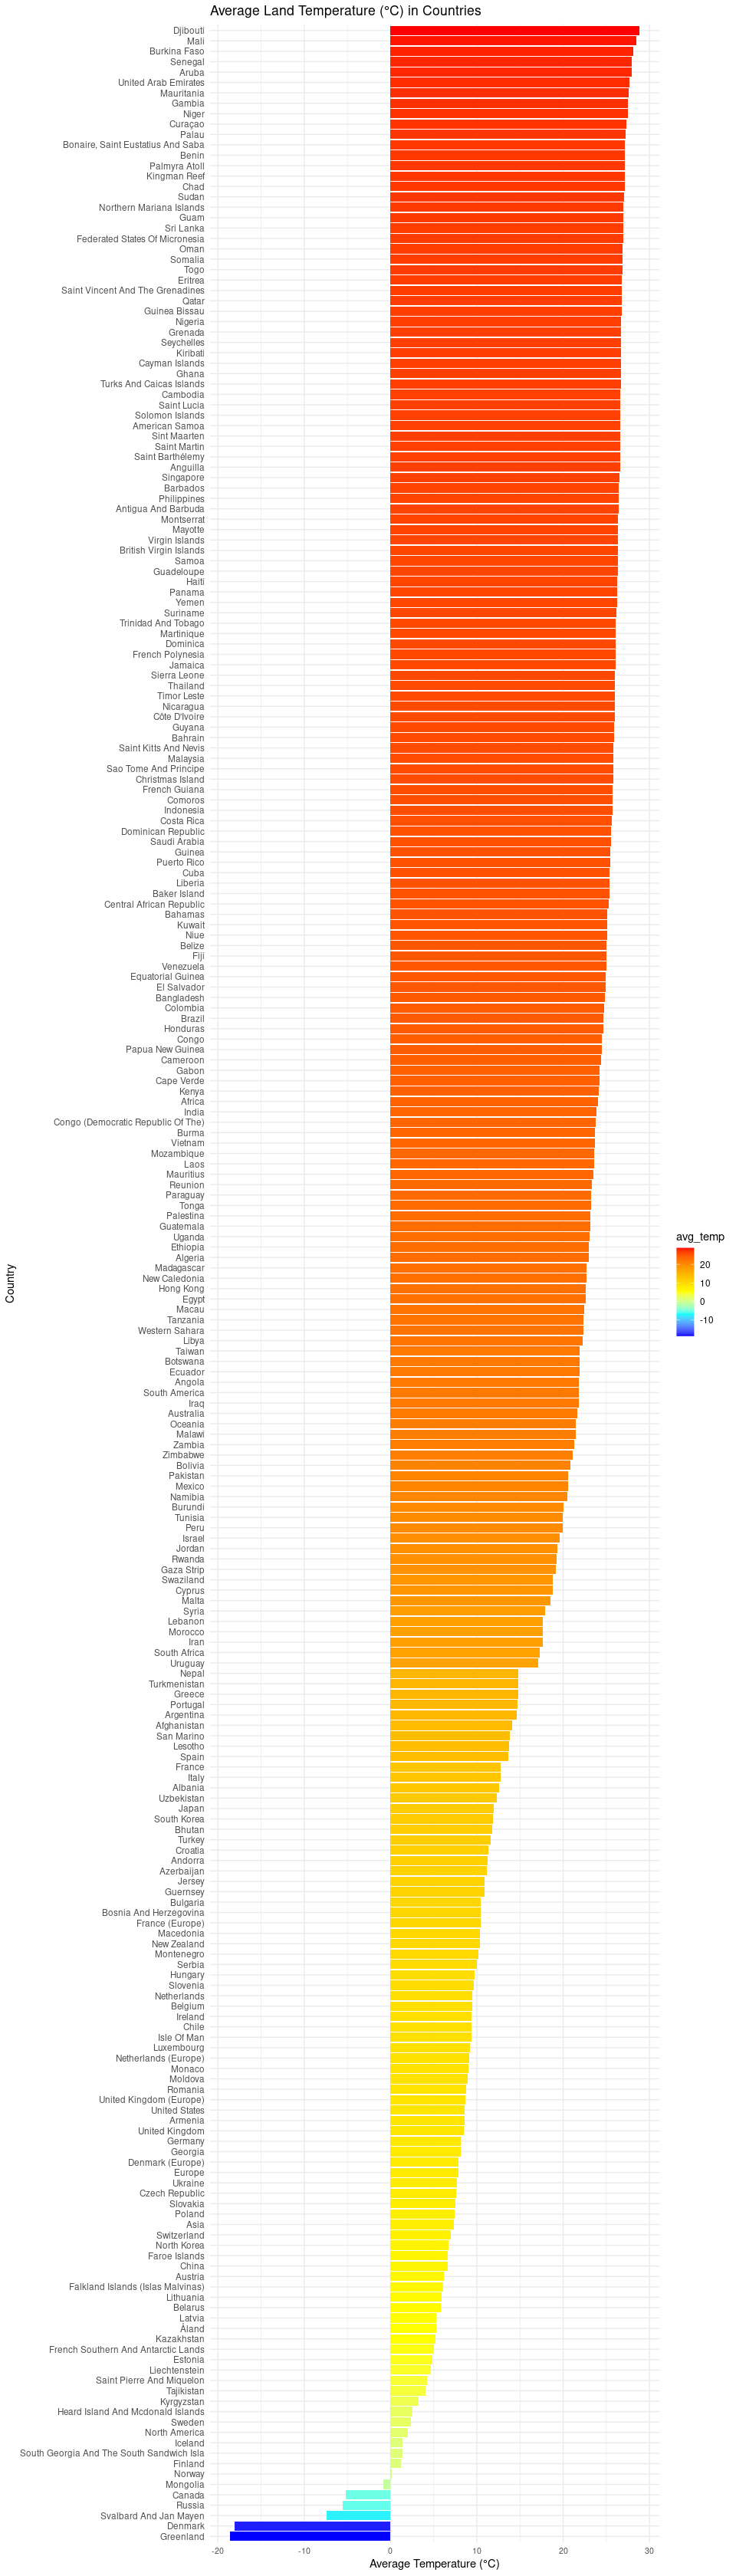

In [ ]:
##Question 3
#| page-break-before: true
#| fig-cap: "This graph depicts the trend in average land temperature across different countries. The temperatures are measured in degrees Celsius (°C). The color gradient indicates the average temperature, with blue being the lowest values and the red with the highest values. Djibouti is noted to have the highest average temperature, while Greenland has the lowest average temperature."

countries_avg_temp <- countries_avg_temp %>%
  arrange(desc(avg_temp))

ggplot(countries_avg_temp, aes(x = reorder(country, avg_temp), y = avg_temp, fill = avg_temp)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "Country", y = "Average Temperature (°C)", 
       title = "Average Land Temperature (°C) in Countries") +
  scale_fill_gradientn(colors = c("blue", "cyan", "yellow", "orange", "red"), 
                       values = scales::rescale(c(0, 0.25, 0.5, 0.75, 1))) +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 8)) 

Figure 3: This graph depicts the trend in average land temperature
across different countries. The temperatures are measured in degrees
Celsius (°C). The color gradient indicates the average temperature, with
blue being the lowest values and the red with the highest values.
Djibouti is noted to have the highest average temperature, while
Greenland has the lowest average temperature.”

Figure 3 corresponds to the question “How does the average land
temperature vary across different parts of the world?”.

#### 4. Discussion

The analysis of global land temperatures reveals significant insights
into climate change patterns. This discussion integrates these findings
within the broader context of climate dynamics.

**Global Average Temperature Changes Over Time**

The data from Figure 1 indicates a marked increase in global
temperatures, especially pronounced from the mid-20th century. This
trend aligns with the escalation of industrial activities and greenhouse
gas emissions, supporting scientific consensus on human-induced climate
change (Garbary et al., 2021). This upward trend highlights the critical
need for effective global environmental policies.

**Average Land Temperature Changes in Canada Compared to the Global
Average**

Figure 2 shows variability in the average temperatures across Canadian
provinces compared to the global trend, with spikes that could signify
extreme weather events or the impacts of industrial activities. Nova
Scotia recorded higher temperatures relative to other provinces, with
Nunavut being the coolest. These variations suggest that localized
factors like geography and proximity to water bodies significantly
influence regional climates, necessitating tailored climate strategies.

**Temperature Variations Across Different Parts of the World**

Figure 3 demonstrates the global disparity in temperature changes, with
Djibouti and Greenland representing the highest as the lowest. As Figure
3 shows global average temperature has varied signficiantly across
different regions. This underlines the uneven impacts of climate change
and the need for region-specific responses to climate policy and
resource distribution.

#### **Conclusion**

This study confirms the significant, human-driven rise in global
temperatures and highlights regional differences within Canada and
worldwide. The variability seen in Canadian temperatures and the spikes
indicating possible extreme events or historical impacts like the
industrial revolution emphasize the complexity of climate phenomena.
These insights are crucial for developing effective, localized climate
adaptation and mitigation strategies. Globally, the data calls for
international cooperation to address diverse climate challenges tailored
to specific regional needs.

#### 5. References

*Climate Change: Earth Surface Temperature Data*. (n.d.).
Www.kaggle.com. Retrieved April 16, 2024, from
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data?select=GlobalLandTemperaturesByCountry.csv

Garbary, D. J., & Hill, N. M. (2021). Climate change in Nova Scotia:
temperature increases from 1961 to 2020. *Proceedings of the Nova
Scotian Institute of Science (NSIS)*, *51*(2), 32.
https://doi.org/10.15273/pnsis.v51i2.11174